## Importing Libraries

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading Data

In [93]:
Survey_2021 = pd.read_csv("D:/DAB103_Project/kaggle_survey_2021_responses.csv")

C:\Users\KNOT\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,195,201,285,286,287,288,289,290,291,292) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [94]:
Survey_2021

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25969,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25970,253,22-24,Man,China,Master’s degree,Student,1-3 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25971,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
25972,277,45-49,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning


  The "Survey Responses" dataset has been taken from Kaggle dataset and it is already Cleaned with below points.

    -Excluded respondents that were flagged by our survey system as “Spam” or "Duplicate.
    -Dropped responses from respondents that spent less than 2 minutes completing the survey
    -Removed the rows from respondents that selected fewer than 15 answer choices in total

In [95]:
#Making the 2nd row as Header, which is having all the questions as it is required for our analysis
Survey_2021.columns=Survey_2021.iloc[0]
Survey_2021 = Survey_2021.drop(0)
Survey_2021

,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL,...,"In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Comet.ml","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Sacred + Omniboard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - TensorBoard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Guild.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Polyaxon","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - ClearML","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Domino Model Monitor","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - MLflow","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - None","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other"
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25969,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25970,253,22-24,Man,China,Master’s degree,Student,1-3 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25971,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
25972,277,45-49,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
#Removing all the special characters from the column names
Survey_2021.columns = Survey_2021.columns.str.replace('[(,),?,#,-, ]', '')
Survey_2021

<ipython-input-96-da9fb1ea98e3>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  Survey_2021.columns = Survey_2021.columns.str.replace('[(,),?,#,-, ]', '')


,Durationinseconds,Whatisyourageyears,Whatisyourgender-SelectedChoice,Inwhichcountrydoyoucurrentlyreside,Whatisthehighestlevelofformaleducationthatyouhaveattainedorplantoattainwithinthenext2years,Selectthetitlemostsimilartoyourcurrentroleormostrecenttitleifretired:-SelectedChoice,Forhowmanyyearshaveyoubeenwritingcodeand/orprogramming,WhatprogramminglanguagesdoyouuseonaregularbasisSelectallthatapply-SelectedChoice-Python,WhatprogramminglanguagesdoyouuseonaregularbasisSelectallthatapply-SelectedChoice-R,WhatprogramminglanguagesdoyouuseonaregularbasisSelectallthatapply-SelectedChoice-SQL,...,Inthenext2yearsdoyouhopetobecomemorefamiliarwithanyofthesetoolsformanagingMLexperimentsSelectallthatapply-SelectedChoice-Comet.ml,Inthenext2yearsdoyouhopetobecomemorefamiliarwithanyofthesetoolsformanagingMLexperimentsSelectallthatapply-SelectedChoice-Sacred+Omniboard,Inthenext2yearsdoyouhopetobecomemorefamiliarwithanyofthesetoolsformanagingMLexperimentsSelectallthatapply-SelectedChoice-TensorBoard,Inthenext2yearsdoyouhopetobecomemorefamiliarwithanyofthesetoolsformanagingMLexperimentsSelectallthatapply-SelectedChoice-Guild.ai,Inthenext2yearsdoyouhopetobecomemorefamiliarwithanyofthesetoolsformanagingMLexperimentsSelectallthatapply-SelectedChoice-Polyaxon,Inthenext2yearsdoyouhopetobecomemorefamiliarwithanyofthesetoolsformanagingMLexperimentsSelectallthatapply-SelectedChoice-ClearML,Inthenext2yearsdoyouhopetobecomemorefamiliarwithanyofthesetoolsformanagingMLexperimentsSelectallthatapply-SelectedChoice-DominoModelMonitor,Inthenext2yearsdoyouhopetobecomemorefamiliarwithanyofthesetoolsformanagingMLexperimentsSelectallthatapply-SelectedChoice-MLflow,Inthenext2yearsdoyouhopetobecomemorefamiliarwithanyofthesetoolsformanagingMLexperimentsSelectallthatapply-SelectedChoice-None,Inthenext2yearsdoyouhopetobecomemorefamiliarwithanyofthesetoolsformanagingMLexperimentsSelectallthatapply-SelectedChoice-Other
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25969,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25970,253,22-24,Man,China,Master’s degree,Student,1-3 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25971,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
25972,277,45-49,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
#From the Survey Dataset, we are deleting the Time from Start to Finish column as we have nothing to do with the time taken to complete the Survey Form
Survey_2021.drop(['Durationinseconds'], axis=1,inplace=True)
Survey_2021

,Whatisyourageyears,Whatisyourgender-SelectedChoice,Inwhichcountrydoyoucurrentlyreside,Whatisthehighestlevelofformaleducationthatyouhaveattainedorplantoattainwithinthenext2years,Selectthetitlemostsimilartoyourcurrentroleormostrecenttitleifretired:-SelectedChoice,Forhowmanyyearshaveyoubeenwritingcodeand/orprogramming,WhatprogramminglanguagesdoyouuseonaregularbasisSelectallthatapply-SelectedChoice-Python,WhatprogramminglanguagesdoyouuseonaregularbasisSelectallthatapply-SelectedChoice-R,WhatprogramminglanguagesdoyouuseonaregularbasisSelectallthatapply-SelectedChoice-SQL,WhatprogramminglanguagesdoyouuseonaregularbasisSelectallthatapply-SelectedChoice-C,...,Inthenext2yearsdoyouhopetobecomemorefamiliarwithanyofthesetoolsformanagingMLexperimentsSelectallthatapply-SelectedChoice-Comet.ml,Inthenext2yearsdoyouhopetobecomemorefamiliarwithanyofthesetoolsformanagingMLexperimentsSelectallthatapply-SelectedChoice-Sacred+Omniboard,Inthenext2yearsdoyouhopetobecomemorefamiliarwithanyofthesetoolsformanagingMLexperimentsSelectallthatapply-SelectedChoice-TensorBoard,Inthenext2yearsdoyouhopetobecomemorefamiliarwithanyofthesetoolsformanagingMLexperimentsSelectallthatapply-SelectedChoice-Guild.ai,Inthenext2yearsdoyouhopetobecomemorefamiliarwithanyofthesetoolsformanagingMLexperimentsSelectallthatapply-SelectedChoice-Polyaxon,Inthenext2yearsdoyouhopetobecomemorefamiliarwithanyofthesetoolsformanagingMLexperimentsSelectallthatapply-SelectedChoice-ClearML,Inthenext2yearsdoyouhopetobecomemorefamiliarwithanyofthesetoolsformanagingMLexperimentsSelectallthatapply-SelectedChoice-DominoModelMonitor,Inthenext2yearsdoyouhopetobecomemorefamiliarwithanyofthesetoolsformanagingMLexperimentsSelectallthatapply-SelectedChoice-MLflow,Inthenext2yearsdoyouhopetobecomemorefamiliarwithanyofthesetoolsformanagingMLexperimentsSelectallthatapply-SelectedChoice-None,Inthenext2yearsdoyouhopetobecomemorefamiliarwithanyofthesetoolsformanagingMLexperimentsSelectallthatapply-SelectedChoice-Other
1,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
5,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,NaN,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25969,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25970,22-24,Man,China,Master’s degree,Student,1-3 years,Python,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25971,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
25972,45-49,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***We see that there are many 'NaN' values in the dataset, but they are mandatory Nulls. And we know that this is a Survey Dataset and all the Null values mean "No" because they didnt select that option. As it doesnt look good to see so many NaN values and it might affect our results, So lets replace all the NaN values with "No"

In [98]:
Survey_2021.fillna('No')

,Whatisyourageyears,Whatisyourgender-SelectedChoice,Inwhichcountrydoyoucurrentlyreside,Whatisthehighestlevelofformaleducationthatyouhaveattainedorplantoattainwithinthenext2years,Selectthetitlemostsimilartoyourcurrentroleormostrecenttitleifretired:-SelectedChoice,Forhowmanyyearshaveyoubeenwritingcodeand/orprogramming,WhatprogramminglanguagesdoyouuseonaregularbasisSelectallthatapply-SelectedChoice-Python,WhatprogramminglanguagesdoyouuseonaregularbasisSelectallthatapply-SelectedChoice-R,WhatprogramminglanguagesdoyouuseonaregularbasisSelectallthatapply-SelectedChoice-SQL,WhatprogramminglanguagesdoyouuseonaregularbasisSelectallthatapply-SelectedChoice-C,...,Inthenext2yearsdoyouhopetobecomemorefamiliarwithanyofthesetoolsformanagingMLexperimentsSelectallthatapply-SelectedChoice-Comet.ml,Inthenext2yearsdoyouhopetobecomemorefamiliarwithanyofthesetoolsformanagingMLexperimentsSelectallthatapply-SelectedChoice-Sacred+Omniboard,Inthenext2yearsdoyouhopetobecomemorefamiliarwithanyofthesetoolsformanagingMLexperimentsSelectallthatapply-SelectedChoice-TensorBoard,Inthenext2yearsdoyouhopetobecomemorefamiliarwithanyofthesetoolsformanagingMLexperimentsSelectallthatapply-SelectedChoice-Guild.ai,Inthenext2yearsdoyouhopetobecomemorefamiliarwithanyofthesetoolsformanagingMLexperimentsSelectallthatapply-SelectedChoice-Polyaxon,Inthenext2yearsdoyouhopetobecomemorefamiliarwithanyofthesetoolsformanagingMLexperimentsSelectallthatapply-SelectedChoice-ClearML,Inthenext2yearsdoyouhopetobecomemorefamiliarwithanyofthesetoolsformanagingMLexperimentsSelectallthatapply-SelectedChoice-DominoModelMonitor,Inthenext2yearsdoyouhopetobecomemorefamiliarwithanyofthesetoolsformanagingMLexperimentsSelectallthatapply-SelectedChoice-MLflow,Inthenext2yearsdoyouhopetobecomemorefamiliarwithanyofthesetoolsformanagingMLexperimentsSelectallthatapply-SelectedChoice-None,Inthenext2yearsdoyouhopetobecomemorefamiliarwithanyofthesetoolsformanagingMLexperimentsSelectallthatapply-SelectedChoice-Other
1,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,No,No,...,No,No,No,No,No,No,No,No,No,No
2,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,No,No,SQL,C,...,No,No,No,No,No,No,No,No,None,No
3,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,No,No,No,...,No,No,TensorBoard,No,No,No,No,No,No,No
4,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,No,No,No,...,No,No,No,No,No,No,No,No,None,No
5,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,No,No,C,...,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25969,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,No,SQL,No,...,No,No,No,No,No,No,No,No,No,No
25970,22-24,Man,China,Master’s degree,Student,1-3 years,Python,No,No,No,...,No,No,No,No,No,No,No,No,No,No
25971,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,No,No,No,No,...,No,No,No,No,No,No,No,No,None,No
25972,45-49,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,No,SQL,No,...,No,No,No,No,No,No,No,No,No,No


## Checking Outliers

In [99]:
# Lets check if there are any outliers in the Age Column i.e Q1 
df_new = Survey_2021.Whatisyourageyears.value_counts()
df_new

25-29    4931
18-21    4901
22-24    4694
30-34    3441
35-39    2504
40-44    1890
45-49    1375
50-54     964
55-59     592
60-69     553
70+       128
Name: Whatisyourageyears, dtype: int64

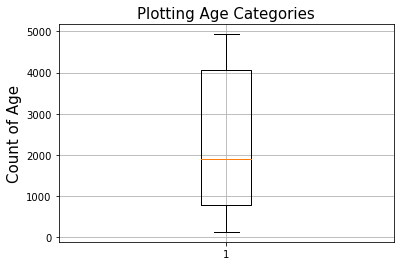

In [100]:
plt.boxplot(df_new)
plt.title('Plotting Age Categories',fontsize = 15)
plt.ylabel('Count of Age',fontsize = 15)
plt.grid()
plt.show()

From the above Plot, we can say there are few values away from the Quartile-1 and Quartile-3. But we cannot consider them as Outliers in this situation because there might be less people in 70+ category that are using Data Science. Also the people between 18 and 30 category have took more number of surveys because the count of the people is also more.

## Data Transformation

In our given dataset the multiple choice questions (only a single choice can be selected) were recorded in
individual columns. 

And also multiple selection questions (multiple choices can be selected)were split into multiple columns
(with one column per answer choice).

So we didnt have to transform our Dataset for our further analysis and visualizations .

As our dataset is ready for Analysis lets connect CSV file to Tableau. We have choosed to do our visualizations using Tableau.